In [1]:
import fasttext.util

In [2]:
fasttext.util.download_model('ta', if_exists='ignore')  # English

'cc.ta.300.bin'

In [3]:
#ft = fasttext.load_model('cc.ta.300.bin')

In [4]:
#ft.get_word_vector('பள்ளி')

In [5]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	#tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
    # Strip all words
    #tokens = [word.strip() for word in tokens]
	return tokens

# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

# load document
in_filename = 'ponniayan.txt'
doc = load_doc(in_filename)
print(doc[:200])

# clean document
tokens = clean_doc(doc)
print(tokens[:50])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

# organize into sequences of tokens
length = 25 + 1
sequences = list()
for i in range(length, len(tokens)):
	# select sequence of tokens
	seq = tokens[i-length:i]
	# convert into a line
	line = ' '.join(seq)
	# store
	sequences.append(line)
print('Total Sequences: %d' % len(sequences))
print("Sample Sequences", sequences[0])

# save sequences to file
out_filename = 'ponniayan_sequences.txt'
save_doc(sequences, out_filename)



அத்தியாயம் 1 - ஆடித்திருநாள்
ஆதி அந்தமில்லாத கால வெள்ளத்தில் கற்பனை ஓடத்தில் ஏறி நம்முடன் சிறிது நேரம் பிரயாணம் செய்யுமாறு நேயர்களை அழைக்கிறோம். விநாடிக்கு ஒரு நூற்றாண்டு வீதம் எளிதில் கடந்து இன்றைக
['அத்தியாயம்', '1', '', 'ஆடித்திருநாள்', 'ஆதி', 'அந்தமில்லாத', 'கால', 'வெள்ளத்தில்', 'கற்பனை', 'ஓடத்தில்', 'ஏறி', 'நம்முடன்', 'சிறிது', 'நேரம்', 'பிரயாணம்', 'செய்யுமாறு', 'நேயர்களை', 'அழைக்கிறோம்', 'விநாடிக்கு', 'ஒரு', 'நூற்றாண்டு', 'வீதம்', 'எளிதில்', 'கடந்து', 'இன்றைக்குத்', 'தொள்ளாயிரத்து', 'எண்பத்திரண்டு', '1950ல்', 'எழுதியது', 'ஆண்டுகளுக்கு', 'முந்திய', 'காலத்துக்குச்', 'செல்வோமாக', 'தொண்டை', 'நாட்டுக்கும்', 'சோழ', 'நாட்டுக்கும்', 'இடையில்', 'உள்ள', 'திருமுனைப்பாடி', 'நாட்டின்', 'தென்பகுதியில்', 'தில்லைச்', 'சிற்றம்பலத்துக்கு', 'மேற்கே', 'இரண்டு', 'காததூரத்தில்', 'அலை', 'கடல்', 'போன்ற']
Total Tokens: 407087
Unique Tokens: 71895
Total Sequences: 407061
Sample Sequences அத்தியாயம் 1  ஆடித்திருநாள் ஆதி அந்தமில்லாத கால வெள்ளத்தில் கற்பனை ஓடத்தில் ஏறி நம்முடன் சிறிது நேரம் பிரயாணம் செய்யு

In [6]:
from numpy import array
from pickle import dump
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load
in_filename = 'ponniayan_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1



In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# define sequences
# pad sequence
sequences = pad_sequences(sequences, padding='post')
print(sequences)

[[  135 10740 71894 ...  6818 27883     0]
 [10740 71894  3511 ... 27883 13487     0]
 [71894  3511 71892 ... 13487 13488     0]
 ...
 [ 1666 14639 71885 ... 17898    26 27882]
 [14639 71885 27877 ...    26 27882    74]
 [71885 27877 71886 ... 27882    74  3987]]


In [8]:
# separate into input and output
sequences = array(sequences)
sequences.shape

(407061, 26)

In [9]:
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(X, y, batch_size=128, epochs=5, validation_split=0.33)

# save the model to file
model.save('ponniayan_model.h5')
# save the tokenizer
dump(tokenizer, open('ponniayan_tokenizer.pkl', 'wb'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            3594750   
_________________________________________________________________
lstm (LSTM)                  (None, 25, 100)           60400     
_________________________________________________________________
dropout (Dropout)            (None, 25, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 71895)             7

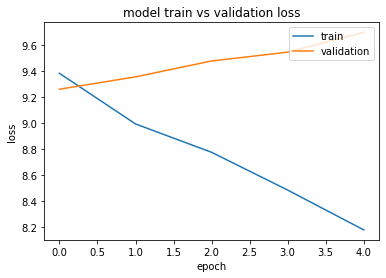

In [10]:
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

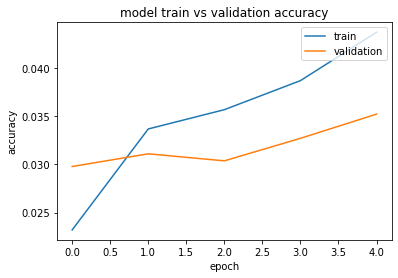

In [11]:
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [12]:
from random import randint
from pickle import load
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='post')
		# predict probabilities for each word
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)

# load cleaned text sequences
in_filename = 'ponniayan_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) 

# load the model
model = load_model('ponniayan_model.h5')

# load the tokenizer
tokenizer = load(open('ponniayan_tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

திரட்டி வந்திருக்கிறோம் என்றுகூட அவர்கள் சொல்லலாம் ஆனால் சக்கரவர்த்தியை நாம் தனிப்படப் பார்க்க முடிகிறதில்லை அவருடைய அந்தரங்க விருப்பத்தை அறிய ஒரு நிமிஷங்கூட அவரிடம் தனித்துப் பேச முடிவதில்லை ஏன் என்பது எல்லாருக்கும் தெரிந்ததே சக்கரவர்த்தியின்

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து வந்து


In [13]:
seq_length

25

In [16]:
seed_text = 'ஒரு'
seq_length = 25
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

சமயம் ஒரு பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய ஒரு பெரிய பெரிய ஒரு பெரிய பெரிய ஒரு பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய பெரிய
